In [10]:
pip install tensorflow

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
You should consider upgrading via the '/home/ma-user/anaconda3/envs/TensorFlow-2.1/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install sklearn

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
You should consider upgrading via the '/home/ma-user/anaconda3/envs/TensorFlow-2.1/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install openpyxl

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
You should consider upgrading via the '/home/ma-user/anaconda3/envs/TensorFlow-2.1/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# 读取训练集和测试集数据
train_data = pd.read_csv("train_data(1).csv")
test_data = pd.read_csv("test_data(1).csv")

# 提取特征和目标变量
X_train = train_data.drop(columns=["Discharge", "Date","Swe"]).values
y_train = train_data["Discharge"].values
X_test = test_data.drop(columns=["Discharge", "Date","Swe"]).values
y_test = test_data["Discharge"].values

# 定义创建神经网络模型的函数
def create_model(optimizer='adam', activation='relu', neurons1=64, neurons2=32):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(neurons1, activation=activation, input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(neurons2, activation=activation),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# 创建一个KerasRegressor对象，用于包装模型
model = KerasRegressor(build_fn=create_model, verbose=0)

# 定义超参数网格
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh'],
    'neurons1': [32, 64, 128],
    'neurons2': [16, 32, 64]
}

# 使用网格搜索
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X_train, y_train)

# 输出最优参数和最优得分
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)

# 使用最优模型进行预测
best_model = grid_result.best_estimator_
predictions = best_model.predict(X_test)

# 评估模型
scores = cross_val_score(best_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
print("Cross Validation Scores: ", scores)
print("Mean Squared Error: ", scores.mean())

print("Predicted values:", predictions)
print("True values:", y_test)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

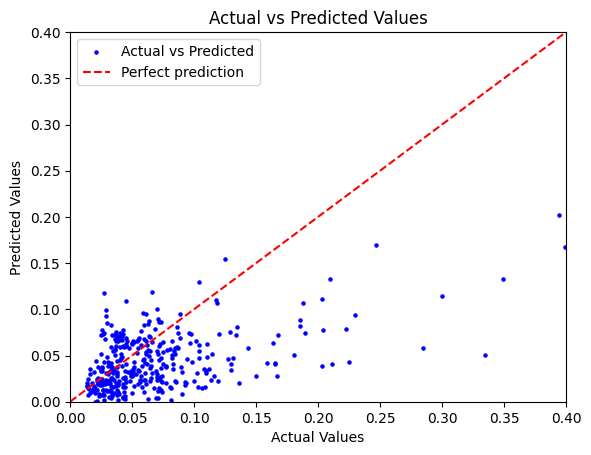

In [6]:
import matplotlib.pyplot as plt

# 绘制预测值和实际值的散点图
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted',s=5)

# 绘制对角线
plt.plot([0, 0.4], [0, 0.4], color='red', linestyle='--', label='Perfect prediction')

# 设置横纵坐标范围
plt.xlim(0, 0.4)
plt.ylim(0, 0.4)

# 添加标题和标签
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# 显示图形
plt.show()

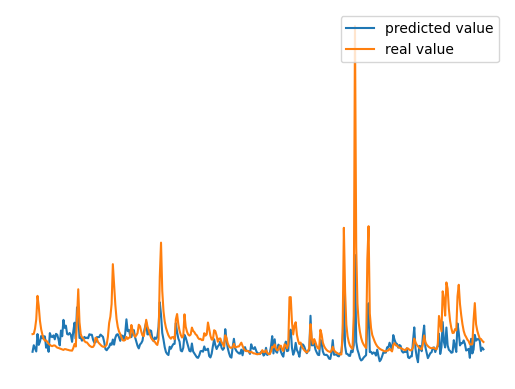

In [21]:
import matplotlib.pyplot as plt
p1 = predictions
y1 = X_test[:, 0]
p2 = y_test
y2 = X_test[:, 0]

plt.plot(p1)
plt.plot(p2)

plt.legend(['predicted value', 'real value'], loc='upper right')
plt.axis('off')
plt.show()
